In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import time

In [9]:
userprofile = pd.read_csv("/Users/sheikita/Desktop/relax_challenge/takehome_users.csv", encoding ='latin-1')

In [18]:
userprofile.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [20]:
userprofile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [23]:
userprofile.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


From the user profile dataset, it is obsvered that last_session_creation_time and invited_by_user_id have some missing values. From the details provided given that "invited_by_user_id" is an optional field, missing those values are not mandatory.

Even if these variables "opted_in_to_mailing_list" and "enabled_for_marketing_drip" were loaded as numerical variables, they are actually categorical ones. It will make more sense to convert them into categorical type. Time variable such "creation_time" should be converted to datetime variables.
unix timestamp of last login


In [25]:
userprofile['creation_time'] = pd.to_datetime(userprofile['creation_time'])


In [26]:
userprofile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [14]:
usereng = pd.read_csv('/Users/sheikita/Desktop/relax_challenge/takehome_user_engagement.csv')

In [24]:
usereng.info()
usereng.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [16]:
usereng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
usereng.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


Engagement dataset contains 207,917 observations, which indicates that there are some users that have logged multiple times. User_id variable is from 1 to 12,000, representing our users.

Doing further analysis on this dataset, we can identify "adopted users". The definition of an adopted user is one that logged into the product on three separate days in at least one seven day period.

Assumption to filter our users is that we need to look for users that logged in within 1 week apart. Thus, we are looking for the difference of the last login time and the firts login time to be approx. 1 week. Need to convert "time_stamp" variable to datetime.


In [27]:
usereng['time_stamp'] = pd.to_datetime(usereng['time_stamp'])


In [28]:
# Sort users with the number of times they logged in
usereng.sort_values(by=['user_id', 'time_stamp'], inplace=True)


In [29]:
usereng

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [31]:
logcounts = usereng.groupby(by=['user_id']).count()[['visited']]
logcounts

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
6,1
7,1
10,284
11,1


In [36]:
logcounts['visited'].iplot(kind='hist', xTitle=' # of logins ',
                  yTitle='login count', title= ' Logins of users over 2 years')

In [37]:
iduser = userprofile[['object_id']].copy()
iduser.set_index('object_id', inplace=True)

logcounts = iduser.join(logcounts, how='left').fillna(0)

,visited
object_id,
1,1.0
2,14.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,0.0


In [39]:
logcounts['adopted'] = np.nan


In [40]:
logcounts.loc[logcounts.visited < 3, 'adopted'] = 0

In [41]:
logcounts

,visited,adopted
object_id,,
1,1.0,0.0
2,14.0,NaN
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,0.0,0.0
9,0.0,0.0


In [43]:
threeids = logcounts[logcounts.adopted.isnull()].index.values.tolist()
threeob = usereng[usereng.user_id.isin(threeids)].copy()


In [44]:
#Difference between logins 
def get_daterange(series):
    return (max(series) - min(series))

In [46]:
timedifference = threeob.groupby('user_id')['time_stamp'].apply(get_daterange)
timedifference

user_id
2       136 days
10      503 days
20       79 days
33       81 days
42      558 days
43      104 days
50      140 days
53       81 days
59       83 days
60       55 days
63      531 days
69      699 days
74      222 days
77       28 days
80       64 days
81      335 days
82      475 days
87      251 days
95       53 days
126      46 days
133     244 days
135     126 days
136      49 days
141     138 days
142      83 days
146     446 days
153     391 days
160     391 days
165      99 days
168     531 days
          ...   
11873   584 days
11879    37 days
11880   125 days
11885   103 days
11893    75 days
11895   381 days
11902    20 days
11904    25 days
11906    51 days
11909   446 days
11913   110 days
11920   360 days
11924   249 days
11935    45 days
11939   267 days
11948    31 days
11949   122 days
11957   474 days
11958   354 days
11959   615 days
11961   223 days
11964   472 days
11965    24 days
11967   139 days
11969   363 days
11975   419 days
11980    75 days
11981 

In [47]:
timedifference.describe()

count                        2248
mean     226 days 04:09:10.889679
std      209 days 01:43:24.737490
min               3 days 00:00:00
25%              51 days 00:00:00
50%             139 days 00:00:00
75%             363 days 00:00:00
max             727 days 00:00:00
Name: time_stamp, dtype: object

The min indicates that some users that used the product 3 or more time did it consecutively over a 3-day period. These users do not meet the definition of adopted so should be excluded. 

In [50]:
users_span_7days = timedifference[timedifference >= '7 days'].index.tolist()
users_span_7days


[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 59,
 60,
 63,
 69,
 74,
 77,
 80,
 81,
 82,
 87,
 95,
 126,
 133,
 135,
 136,
 141,
 142,
 146,
 153,
 160,
 165,
 168,
 171,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 221,
 230,
 241,
 245,
 247,
 251,
 263,
 265,
 275,
 277,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 330,
 337,
 341,
 345,
 347,
 351,
 362,
 363,
 367,
 370,
 375,
 382,
 383,
 390,
 397,
 398,
 401,
 417,
 418,
 430,
 445,
 450,
 455,
 460,
 462,
 469,
 471,
 472,
 478,
 479,
 481,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 511,
 512,
 518,
 520,
 522,
 528,
 529,
 535,
 540,
 543,
 547,
 553,
 555,
 561,
 564,
 572,
 575,
 589,
 591,
 601,
 603,
 605,
 607,
 608,
 617,
 618,
 627,
 628,
 632,
 634,
 639,
 649,
 665,
 669,
 679,
 680,
 710,
 715,
 716,
 717,
 724,
 725,
 728,
 736,
 738,
 746,
 754,
 772,
 783,
 786,
 788,
 793,
 804,
 814,
 815,
 817,
 828,
 845,
 850,
 851,
 869,
 874,
 882,
 885,
 887,
 901,
 906,
 907,
 912,
 928,
 932,


These are the users that logged into the product on three separate days in at least one seven-day period.

In [53]:
threeob.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [54]:
# Convert datetime to year/month/day 
import datetime
threeob['time_stamp'] = threeob['time_stamp'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day))
threeob

,time_stamp,user_id,visited
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1
5,2013-12-31,2,1
6,2014-01-08,2,1
7,2014-02-03,2,1
8,2014-02-08,2,1
9,2014-02-09,2,1
10,2014-02-13,2,1


In [55]:
min(threeob.groupby('user_id')['time_stamp'].nunique().sort_values())

3

We are able to confirm that indeed are users that logged every 3 days. 

In [57]:
# Include the list of users that logged at least 3 times/wek
logcounts.loc[logcounts.index.isin(users_span_7days), 'adopted'] = 1

In [58]:
logcounts

,visited,adopted
object_id,,
1,1.0,0.0
2,14.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,0.0,0.0
9,0.0,0.0


In [59]:
#Find users with missing values in adopted
logcounts[logcounts.adopted.isnull()]

,visited,adopted
object_id,,
3059,3.0,NaN
3222,3.0,NaN
3638,3.0,NaN
4093,3.0,NaN
4396,3.0,NaN
5970,3.0,NaN
6981,3.0,NaN
10277,3.0,NaN


In [60]:
#Assumption that they did not login every 3 days
timedifference[timedifference< '7 days'].index.tolist()

[3059, 3222, 3638, 4093, 4396, 5970, 6981, 10277]

In [61]:
#Fill values with 0 or not adopted
logcounts.loc[logcounts.index.isin(timedifference[timedifference< '7 days'].index.tolist()), 'adopted'] = 0

In [62]:
logcounts[logcounts.adopted.isnull()]

,visited,adopted
object_id,,


In [63]:
logcounts.adopted.value_counts()

0.0    9760
1.0    2240
Name: adopted, dtype: int64

In [64]:
logcounts.tail()

,visited,adopted
object_id,,
11996,1.0,0.0
11997,1.0,0.0
11998,1.0,0.0
11999,1.0,0.0
12000,1.0,0.0


In [65]:
userprofile.set_index('object_id', inplace=True)
userprofile.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [67]:
#Join the logcounts dataset with the profile dataset. Adopted will be our label
adoptdf = userprofile.join(logcounts)
adoptdf.info()
adoptdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
visited                       12000 non-null float64
adopted                       12000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 1.4+ MB


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0


In [69]:
adoptdf.last_session_creation_time.describe()

count    8.823000e+03
mean     1.379279e+09
std      1.953116e+07
min      1.338452e+09
25%      1.363195e+09
50%      1.382888e+09
75%      1.398443e+09
max      1.402067e+09
Name: last_session_creation_time, dtype: float64

In [70]:
adoptdf.loc[adoptdf.last_session_creation_time.isnull(), 'last_session_creation_time'] = 0

In [72]:
adoptdf[adoptdf.last_session_creation_time.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
object_id,,,,,,,,,,,


In [74]:
adoptdf.adopted.describe().T

count    12000.000000
mean         0.186667
std          0.389660
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: adopted, dtype: float64

From all 12K users, approximately 19% became adopted users. Clearly our data is imbalanced.

In [75]:
adoptdf.adopted.value_counts()

0.0    9760
1.0    2240
Name: adopted, dtype: int64

In [76]:
adoptdf.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0


Now is time to build our model but will do some feature selection first since some variables will create more noise than help. These are: Name, email and visited. 

In [77]:
adoptdf.drop(labels=['name', 'email', 'visited'], axis=1, inplace=True)
adoptdf.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [78]:
adoptdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 8 columns):
creation_time                 12000 non-null datetime64[ns]
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.1+ MB


In [80]:
# First date an user created an account in the complete dataset
first_date = min(adoptdf.creation_time)
first_date

Timestamp('2012-05-31 00:43:27')

In [82]:
ncreationtime = adoptdf.creation_time - first_date
ncreationtime

object_id
1       691 days 03:10:03
2       533 days 03:01:37
3       292 days 22:31:25
4       355 days 07:26:01
5       231 days 09:30:53
6       565 days 02:53:39
7       199 days 12:41:05
8       426 days 04:50:35
9       523 days 03:20:57
10      230 days 21:24:36
11      574 days 03:12:27
12      686 days 23:05:11
13      668 days 15:36:11
14      133 days 15:31:06
15      411 days 20:50:27
16      256 days 09:26:23
17      678 days 13:56:11
18      449 days 23:43:19
19      358 days 14:13:09
20      644 days 11:03:11
21      236 days 11:44:15
22      620 days 05:17:19
23       78 days 07:47:00
24      466 days 21:36:36
25      634 days 23:27:46
26      423 days 00:10:05
27      593 days 16:51:44
28      256 days 19:16:58
29      473 days 01:25:14
30      369 days 00:00:58
               ...       
11971   338 days 06:10:56
11972   105 days 22:39:44
11973   152 days 02:26:20
11974   209 days 15:58:41
11975   296 days 10:26:44
11976   573 days 21:18:14
11977   474 days 18:15:24
11

In [83]:
#Convert creation time to seconds
adoptdf.creation_time = ncreationtime.dt.total_seconds()
adoptdf.describe()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,3.555613e+07,1.014115e+09,0.249500,0.149333,141.884583,5962.957145,0.186667
std,1.871814e+07,6.087938e+08,0.432742,0.356432,124.056723,3383.761968,0.389660
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.000000,0.000000
25%,1.986030e+07,0.000000e+00,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,3.731351e+07,1.368880e+09,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,5.247941e+07,1.393729e+09,0.000000,0.000000,238.250000,8817.000000,0.000000
max,6.306935e+07,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


In [84]:
adoptdf.creation_source.value_counts()


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [85]:
adoptdf = pd.get_dummies(adoptdf, columns=['creation_source'])

In [86]:
adoptdf.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,
1,59713803.0,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
2,46062097.0,1.396238e+09,0,0,1,316.0,1.0,0,1,0,0,0
3,25309885.0,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
4,30698761.0,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
5,19992653.0,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0


In [87]:
adoptdf.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
10628.0    10
7012.0     10
4612.0     10
4803.0     10
1175.0     10
8068.0     10
4302.0     10
2354.0     10
6370.0     10
10481.0    10
9434.0      9
9023.0      9
2922.0      9
4551.0      9
6645.0      9
7698.0      9
3789.0      9
3721.0      9
8554.0      9
3944.0      9
7716.0      9
6808.0      9
6493.0      9
8426.0      9
264.0       8
           ..
4885.0      1
5563.0      1
4231.0      1
3418.0      1
7837.0      1
3814.0      1
4655.0      1
10417.0     1
7979.0      1
5638.0      1
3422.0      1
6164.0      1
594.0       1
1750.0      1
6238.0      1
7425.0      1
5200.0      1
9325.0      1
4467.0      1
10335.0     1
7916.0      1
1945.0      1
11536.0     1
5989.0      1
11196.0     1
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [88]:
adoptdf.loc[adoptdf.invited_by_user_id.isnull(), 'invited_by_user_id'] = 0
adoptdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 12 columns):
creation_time                         12000 non-null float64
last_session_creation_time            12000 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    12000 non-null float64
adopted                               12000 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
dtypes: float64(4), int64(3), uint8(5)
memory usage: 1.1 MB


In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve

In [93]:
X = adoptdf.drop(['adopted'], axis=1)
y = adoptdf['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [94]:
rfc = RandomForestClassifier()

# Specify a Hyperparameter space
param_grid_rf = {
                 'n_estimators': [50, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 10, 20, None],
                 'min_samples_leaf': randint(1, 9),
                 'min_samples_split': randint(2, 9),
                 'max_features': randint(1, 9)
                }

# Instantiate CV Object
rfc_cv = RandomizedSearchCV(rfc, param_grid_rf, cv=10, iid=False)


In [95]:
# Train 
rfc_cv.fit(X_train, y_train)

# Predict 

ypredictr =rfc_cv.predict(X_test)


In [98]:
rf_accuracy = accuracy_score(y_test,ypredictr)

In [99]:
rf_accuracy

0.9705555555555555

In [101]:
conrf_matrix = confusion_matrix(y_test, ypredictr)
conrf_matrix

array([[2904,   24],
       [  82,  590]])

Text(0.5, 257.44, 'Predicted label')

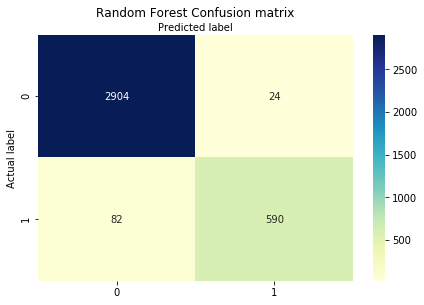

In [103]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conrf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

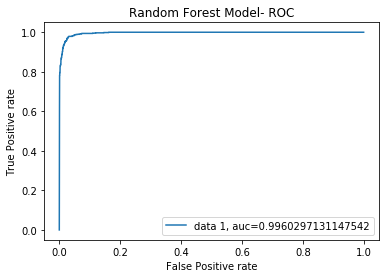

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob = rfc_cv.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Random Forest Model- ROC')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)
plt.show()

In [114]:
# Classification for Random Forest
print(classification_report(y_test, ypredictr)) 

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2928
        1.0       0.96      0.88      0.92       672

avg / total       0.97      0.97      0.97      3600



In [107]:
# Best Parameters from model
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [109]:
pd.DataFrame(rfc_cv.best_estimator_.feature_importances_, 
             index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

,importance
last_session_creation_time,0.635812
creation_time,0.312376
org_id,0.026971
invited_by_user_id,0.013525
creation_source_GUEST_INVITE,0.003320
creation_source_PERSONAL_PROJECTS,0.002178
opted_in_to_mailing_list,0.001521
creation_source_SIGNUP,0.001153
creation_source_ORG_INVITE,0.001120
enabled_for_marketing_drip,0.001111


According to our model, the factors that predict future user adoption are last_session_creation tine followed by creation time and org_id, invited_by_user_id. Not that much surprise by last_creation_session, which tracks when they last logged in. Given that org_id and invited_by_user_id made it to the top list, it seems reasonable to assume that they will be most likely to log in as long as their community continues to do work there. It will be interesting to see if by providing incentives to the communities of the "not adopted' users will increase their usage.


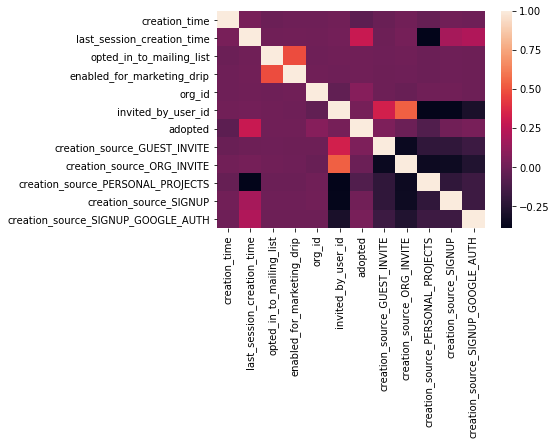

In [112]:
fig = plt.figure()
ax = plt.subplot(111)

corr = adoptdf.corr()
ax = sns.heatmap(corr)
plt.show()

In [113]:
corr['adopted'].sort_values(ascending=False)

adopted                               1.000000
last_session_creation_time            0.296935
org_id                                0.076437
creation_source_GUEST_INVITE          0.053546
creation_source_SIGNUP_GOOGLE_AUTH    0.034449
invited_by_user_id                    0.030837
creation_source_SIGNUP                0.016040
opted_in_to_mailing_list              0.008956
enabled_for_marketing_drip            0.007497
creation_source_ORG_INVITE           -0.005401
creation_time                        -0.057155
creation_source_PERSONAL_PROJECTS    -0.092150
Name: adopted, dtype: float64